In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
# Reads each of the raw data files, drops any rows with missing values, duplicates, or rows that are not from JFK, and saves the cleaned data to a new file in the clean directory
for yy in range(10,19):
    for mm in range(1,13):
        if yy == 18 and mm == 8:
            break
        if mm < 10:
            mm = f'0{mm}'

        df = pd.read_csv(f'data/raw/JFK_{mm}_{yy}.csv', sep=',')

        df = df.drop_duplicates()

        # Only require flights from JFK
        df = df.drop(df[df['ORIGIN'] != 'JFK'].index)

        # Where delayed, but no delay reason is given, drop the row
        df = df[~((df['DEP_DELAY_GROUP'] > 0) & df[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].isna().any(axis=1))]
        df = df.fillna(0)

        df.to_csv(f'data/clean/JFK_{mm}_{yy}.csv', index=False)

In [3]:
# Concatenates all of the cleaned data files into one large dataset
full_df = pd.DataFrame()

# Read in the cleaned datafiles spanning from January 2010 to July 2018 (Files are named JFK_MM_YY.csv)
for yy in range(10,19):
    for mm in range(1,13):
        if yy == 18 and mm == 8:
            break
        if mm < 10:
            mm = f'0{mm}'

        df = pd.read_csv(f'data/clean/JFK_{mm}_{yy}.csv', sep=',')
        full_df = pd.concat([full_df, df])
        full_df.to_csv('data/clean/full.csv', index=False)

In [3]:
full_df = pd.read_csv('data/clean/full.csv', sep=',')
full_df

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1/1/2010 12:00:00 AM,JFK,ALB,1840,1836.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/1/2010 12:00:00 AM,JFK,ATL,600,557.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/1/2010 12:00:00 AM,JFK,ATL,820,845.0,25.0,1.0,0.0,25.0,0.0,13.0,0.0,0.0
3,1/1/2010 12:00:00 AM,JFK,ATL,1100,1053.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/1/2010 12:00:00 AM,JFK,ATL,1350,1351.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,7/31/2018 12:00:00 AM,JFK,TPA,1100,1053.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
838849,7/31/2018 12:00:00 AM,JFK,TPA,1330,1340.0,10.0,0.0,0.0,10.0,0.0,13.0,0.0,0.0
838850,7/31/2018 12:00:00 AM,JFK,TPA,1530,1525.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
838851,7/31/2018 12:00:00 AM,JFK,TPA,1910,2037.0,87.0,5.0,0.0,62.0,0.0,0.0,0.0,7.0


In [4]:
weather_df = pd.read_csv('data/JFK_weather_10_18/jfk_weather_cleaned.csv', sep=',')
weather_df

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.000000,1.000000,0,1,0
1,2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.000000,1.000000,0,1,0
2,2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.000000,1.000000,0,1,0
3,2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.000000,1.000000,0,1,0
4,2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.000000,1.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75114,2018-07-27 19:00:00,10.0,76.0,73.0,72.0,88.0,3.0,30.00,30.02,0.00,30.02,-0.766044,-0.642788,1,0,0
75115,2018-07-27 20:00:00,4.0,69.0,69.0,69.0,100.0,13.0,29.99,30.01,1.16,30.01,0.642788,0.766044,1,0,0
75116,2018-07-27 21:00:00,10.0,71.0,70.0,70.0,96.0,0.0,30.02,30.04,0.01,30.04,0.000000,1.000000,1,0,0
75117,2018-07-27 22:00:00,10.0,72.0,71.0,70.0,94.0,5.0,30.00,30.02,0.00,30.02,0.766044,0.642788,1,0,0


In [5]:
# Reformatting departure times to date times
full_df['CRS_DEP_TIME'] = full_df['CRS_DEP_TIME'].apply(lambda x: f"{int(x):04d}")
full_df['DEP_TIME'] = full_df['DEP_TIME'].apply(lambda x: f"{int(x):04d}")
full_df['CRS_DEP_TIME'] = full_df['CRS_DEP_TIME'].apply(lambda x: f"{x[:2]}:{x[2:]}:00")
full_df['DEP_TIME'] = full_df['DEP_TIME'].apply(lambda x: f"{x[:2]}:{x[2:]}:00")
full_df

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1/1/2010 12:00:00 AM,JFK,ALB,18:40:00,18:36:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/1/2010 12:00:00 AM,JFK,ATL,06:00:00,05:57:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/1/2010 12:00:00 AM,JFK,ATL,08:20:00,08:45:00,25.0,1.0,0.0,25.0,0.0,13.0,0.0,0.0
3,1/1/2010 12:00:00 AM,JFK,ATL,11:00:00,10:53:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/1/2010 12:00:00 AM,JFK,ATL,13:50:00,13:51:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,7/31/2018 12:00:00 AM,JFK,TPA,11:00:00,10:53:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
838849,7/31/2018 12:00:00 AM,JFK,TPA,13:30:00,13:40:00,10.0,0.0,0.0,10.0,0.0,13.0,0.0,0.0
838850,7/31/2018 12:00:00 AM,JFK,TPA,15:30:00,15:25:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
838851,7/31/2018 12:00:00 AM,JFK,TPA,19:10:00,20:37:00,87.0,5.0,0.0,62.0,0.0,0.0,0.0,7.0


In [6]:
# reformatting FL_DATE to correct date-time format
# remove AM/PM
full_df['FL_DATE'] = full_df['FL_DATE'].str.replace(r'AM|PM', '', regex=True)

# convert to date time
full_df['FL_DATE'] = pd.to_datetime(full_df['FL_DATE'], format='mixed')
full_df

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2010-01-01 12:00:00,JFK,ALB,18:40:00,18:36:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-01-01 12:00:00,JFK,ATL,06:00:00,05:57:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-01-01 12:00:00,JFK,ATL,08:20:00,08:45:00,25.0,1.0,0.0,25.0,0.0,13.0,0.0,0.0
3,2010-01-01 12:00:00,JFK,ATL,11:00:00,10:53:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-01-01 12:00:00,JFK,ATL,13:50:00,13:51:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,2018-07-31 12:00:00,JFK,TPA,11:00:00,10:53:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
838849,2018-07-31 12:00:00,JFK,TPA,13:30:00,13:40:00,10.0,0.0,0.0,10.0,0.0,13.0,0.0,0.0
838850,2018-07-31 12:00:00,JFK,TPA,15:30:00,15:25:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
838851,2018-07-31 12:00:00,JFK,TPA,19:10:00,20:37:00,87.0,5.0,0.0,62.0,0.0,0.0,0.0,7.0


In [7]:
# Handle "24:00:00" in DEP_TIME
mask1 = full_df['CRS_DEP_TIME'] == '24:00:00'  # Find rows with "24:00:00"
mask2 = full_df['DEP_TIME'] == '24:00:00'  # Find rows with "24:00:00"

# Replace "24:00:00" with "00:00:00"
full_df.loc[mask1, 'DEP_TIME'] = '00:00:00'
full_df.loc[mask2, 'CRS_DEP_TIME'] = '00:00:00'

# Add one day to FL_DATE where DEP_TIME was "24:00:00"
full_df.loc[mask1, 'FL_DATE'] += pd.Timedelta(days=1)

# Convert to proper datetime format
full_df['DEP_DATE_TIME'] = pd.to_datetime(full_df['FL_DATE'].dt.date.astype(str) + ' ' + full_df['CRS_DEP_TIME'])
full_df

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DATE_TIME
0,2010-01-01 12:00:00,JFK,ALB,18:40:00,18:36:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01 18:40:00
1,2010-01-01 12:00:00,JFK,ATL,06:00:00,05:57:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01 06:00:00
2,2010-01-01 12:00:00,JFK,ATL,08:20:00,08:45:00,25.0,1.0,0.0,25.0,0.0,13.0,0.0,0.0,2010-01-01 08:20:00
3,2010-01-01 12:00:00,JFK,ATL,11:00:00,10:53:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01 11:00:00
4,2010-01-01 12:00:00,JFK,ATL,13:50:00,13:51:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01 13:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,2018-07-31 12:00:00,JFK,TPA,11:00:00,10:53:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-31 11:00:00
838849,2018-07-31 12:00:00,JFK,TPA,13:30:00,13:40:00,10.0,0.0,0.0,10.0,0.0,13.0,0.0,0.0,2018-07-31 13:30:00
838850,2018-07-31 12:00:00,JFK,TPA,15:30:00,15:25:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-31 15:30:00
838851,2018-07-31 12:00:00,JFK,TPA,19:10:00,20:37:00,87.0,5.0,0.0,62.0,0.0,0.0,0.0,7.0,2018-07-31 19:10:00


In [8]:
# Ensure datetime format
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])
full_df['DEP_DATE_TIME'] = pd.to_datetime(full_df['DEP_DATE_TIME'])

# Round DEP_DATE_TIME to the nearest hour for merging
full_df['DEP_DATE_TIME_HOURLY'] = full_df['DEP_DATE_TIME'].dt.round('H')

# Sort both dataframes by time (required for merge_asof)
weather_df = weather_df.sort_values('DATE')
full_df = full_df.sort_values('DEP_DATE_TIME_HOURLY')

# Merge, taking the nearest past weather observation
merged_df = pd.merge_asof(
    full_df, 
    weather_df, 
    left_on='DEP_DATE_TIME_HOURLY',  # Use rounded departure time for merging
    right_on='DATE', 
    direction='backward'  # Match the most recent weather before departure
)

# Drop the FL_DATE column as no longer needed and replace it with more informative DEP_DATE_TIME_HOURLY
merged_df.drop(columns=['FL_DATE'], inplace=True)

# Reorder columns
col_data = merged_df.pop("DEP_DATE_TIME_HOURLY")
merged_df.insert(0, "DEP_DATE_TIME_HOURLY", col_data)  # Insert it at index 0 (first column)

merged_df

/var/folders/02/b6cwjcqx2qnf9pnf5z938x6w0000gp/T/ipykernel_26025/1605370364.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_df['DEP_DATE_TIME_HOURLY'] = full_df['DEP_DATE_TIME'].dt.round('H')


,DEP_DATE_TIME_HOURLY,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,...,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 06:00:00,JFK,LAX,06:25:00,06:27:00,2.0,0.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
1,2010-01-01 06:00:00,JFK,SFO,06:00:00,05:58:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
2,2010-01-01 06:00:00,JFK,SJU,06:00:00,06:11:00,11.0,0.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
3,2010-01-01 06:00:00,JFK,PHX,06:15:00,06:13:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
4,2010-01-01 06:00:00,JFK,TPA,06:00:00,05:58:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,2018-07-31 23:00:00,JFK,BUF,22:45:00,22:35:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0
838849,2018-07-31 23:00:00,JFK,BTV,22:45:00,23:35:00,50.0,3.0,0.0,8.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0
838850,2018-07-31 23:00:00,JFK,ROC,22:55:00,22:47:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0
838851,2018-07-31 23:00:00,JFK,BOS,22:55:00,22:54:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0


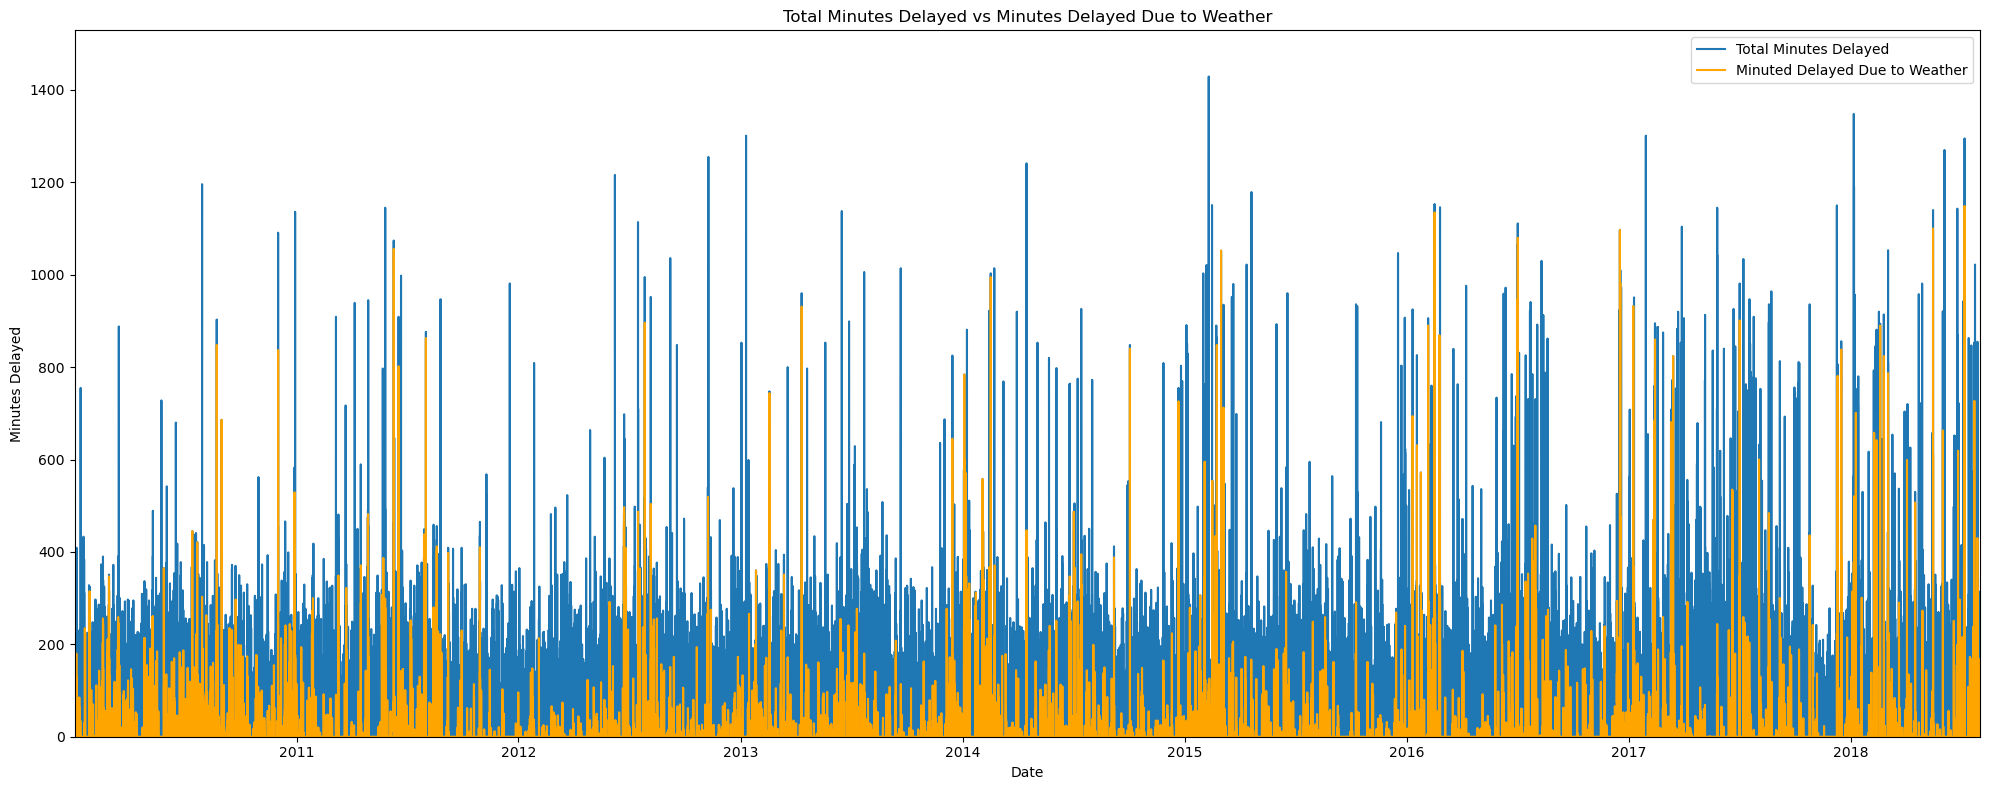

In [9]:
# TODO Have a look at the correlations between these two features
plt.figure(figsize=(20,8))
plt.plot(merged_df['DEP_DATE_TIME_HOURLY'], merged_df['DEP_DELAY_NEW'],label='Total Minutes Delayed')
plt.plot(merged_df['DEP_DATE_TIME_HOURLY'], merged_df['WEATHER_DELAY'],color='orange',label='Minuted Delayed Due to Weather')

plt.xlim(min(merged_df['DEP_DATE_TIME_HOURLY']), max(merged_df['DEP_DATE_TIME_HOURLY']))
plt.ylim(0,max(merged_df['DEP_DELAY_NEW'])+100)
plt.legend()
plt.title("Total Minutes Delayed vs Minutes Delayed Due to Weather")
plt.ylabel("Minutes Delayed")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

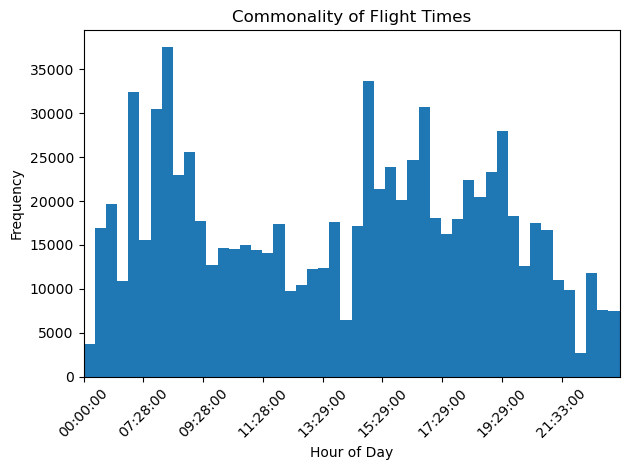

In [27]:
ax = plt.axes()
plt.hist(sorted(merged_df['CRS_DEP_TIME']),bins=48)

plt.title("Commonality of Flight Times")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")

ax.set_xticks([i for i in range(0, len(merged_df['CRS_DEP_TIME'].unique()), 120)])
plt.xticks(rotation=45)
plt.xlim("00:00:00","23:59:59")
plt.tight_layout()

plt.show()

In [11]:
np.mean(merged_df['CRS_DEP_TIME'])

KeyboardInterrupt: 